# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [111]:
# %pip install --upgrade plotly

# # Need this to make map chart to png
# %conda install -c plotly plotly-orca

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import matplotlib.patches as mpatches
import matplotlib.colors as colors

import random

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [6]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [7]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [8]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

## Check for NaN values

In [9]:
df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [10]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [11]:
df_hh_income.isna().any()

Geographic Area    False
City               False
Median Income       True
dtype: bool

In [12]:
#Replace NaN with 0
df_hh_income['Median Income'] = df_hh_income['Median Income'].replace(np.nan, 0)

In [13]:
df_pct_completed_hs.isna().any()

Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool

In [14]:
df_pct_poverty.isna().any()

Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [15]:
df_share_race_city.isna().any()

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool

## Check Duplicate Rows

In [127]:
df_fatalities.duplicated().any()

False

In [128]:
df_hh_income.duplicated().any()

False

In [129]:
df_pct_completed_hs.duplicated().any()

False

In [130]:
df_pct_poverty.duplicated().any()

False

In [131]:
df_share_race_city.duplicated().any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [132]:
df_share_race_city.head(10)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
5,AL,Alabaster city,79.4,13.5,0.4,0.9,9
6,AL,Albertville city,75.9,1.9,0.8,0.5,27.9
7,AL,Alexander City city,62.2,32,0.2,0.9,4.8
8,AL,Alexandria CDP,87.4,10.2,0.3,0.5,0.9
9,AL,Aliceville city,22.6,74.9,0.1,0,1.2


In [133]:
df_hh_income.head(10)

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
5,AL,Alabaster city,71816
6,AL,Albertville city,32911
7,AL,Alexander City city,29874
8,AL,Alexandria CDP,56058
9,AL,Aliceville city,21131


In [134]:
df_pct_completed_hs.head(10)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
5,AL,Alabaster city,89.3
6,AL,Albertville city,72.7
7,AL,Alexander City city,78.1
8,AL,Alexandria CDP,88.8
9,AL,Aliceville city,74.3


In [135]:
df_pct_poverty.head(10)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
5,AL,Alabaster city,11.2
6,AL,Albertville city,26.7
7,AL,Alexander City city,30.4
8,AL,Alexandria CDP,9.7
9,AL,Aliceville city,41.3


In [136]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [137]:
df_pct_poverty['Geographic Area'].unique()    

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [138]:
df_pct_poverty['poverty_rate'].unique()

array(['78.8', '29.1', '25.5', '30.7', '42', '11.2', '26.7', '30.4',
       '9.7', '41.3', '27.7', '27.5', '24.5', '13.8', '31.7', '16.7',
       '19.1', '8.6', '37.6', '31.6', '18.8', '22.4', '28.3', '13',
       '24.7', '20.3', '31.8', '24.1', '22.2', '6.8', '15.7', '28.6',
       '7.1', '38.2', '26.3', '30.1', '25.3', '44.9', '8.1', '28.8',
       '39.1', '42.9', '36.7', '0', '30.9', '32.9', '20.5', '12.7',
       '41.2', '0.5', '4', '19.4', '60.3', '47.6', '18.2', '53.7', '20.7',
       '19.2', '17.3', '27.8', '34.7', '33', '22.5', '39.7', '11.5',
       '10.8', '23.8', '32.4', '5.8', '79.4', '31.9', '36.6', '32.2',
       '30', '17.2', '18.9', '7.4', '39.6', '25.8', '25', '25.1', '19.8',
       '4.9', '19.9', '33.6', '38.6', '14.7', '16.9', '6.6', '16.4',
       '29.3', '15', '31.4', '19.5', '21.2', '10', '32.1', '24.8', '20.1',
       '24', '7.9', '23.5', '32.8', '12.8', '29.8', '10.7', '11.7',
       '18.1', '38.1', '21', '21.9', '8.5', '9.3', '3.6', '12.9', '48',
       '5.1', 

In [139]:
df_pct_poverty[df_pct_poverty.poverty_rate == "-"]

,Geographic Area,City,poverty_rate
573,AL,Whatley CDP,-
608,AK,Attu Station CDP,-
632,AK,Chicken CDP,-
637,AK,Chisana CDP,-
662,AK,Dot Lake CDP,-
...,...,...,...
29261,WY,Oakley CDP,-
29266,WY,Owl Creek CDP,-
29273,WY,Powder River CDP,-
29289,WY,Ryan Park CDP,-


In [140]:
len(df_pct_poverty['poverty_rate'].unique())

771

In [141]:
df_pct_poverty.poverty_rate.replace('-', np.nan, regex=True, inplace=True)

In [142]:
df_pct_poverty[df_pct_poverty.poverty_rate.isna()]

,Geographic Area,City,poverty_rate
573,AL,Whatley CDP,NaN
608,AK,Attu Station CDP,NaN
632,AK,Chicken CDP,NaN
637,AK,Chisana CDP,NaN
662,AK,Dot Lake CDP,NaN
...,...,...,...
29261,WY,Oakley CDP,NaN
29266,WY,Owl Creek CDP,NaN
29273,WY,Powder River CDP,NaN
29289,WY,Ryan Park CDP,NaN


In [143]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)

In [144]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [145]:
poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending = False)

In [146]:
poverty

Geographic Area
MS   26.88
AZ   25.67
GA   23.78
NM   23.08
AR   22.96
LA   22.34
SC   22.16
WV   21.13
OK   20.66
AL   20.65
MO   20.11
KY   20.08
TX   19.92
TN   19.89
AK   19.85
NC   19.75
ID   18.24
DC   18.00
MI   17.90
FL   17.57
CA   17.12
ME   16.89
OR   16.52
MT   16.51
SD   16.03
IN   15.50
WA   15.02
OH   14.85
KS   14.76
VA   14.59
IL   13.88
VT   13.79
MN   13.75
HI   13.40
CO   13.36
NE   12.98
WI   12.86
NH   12.66
DE   12.56
PA   12.52
NV   12.47
IA   12.29
ND   12.16
UT   11.98
NY   11.67
RI   10.37
MD   10.31
WY    9.89
MA    9.59
CT    9.14
NJ    8.19
Name: poverty_rate, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_11456\2074896531.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



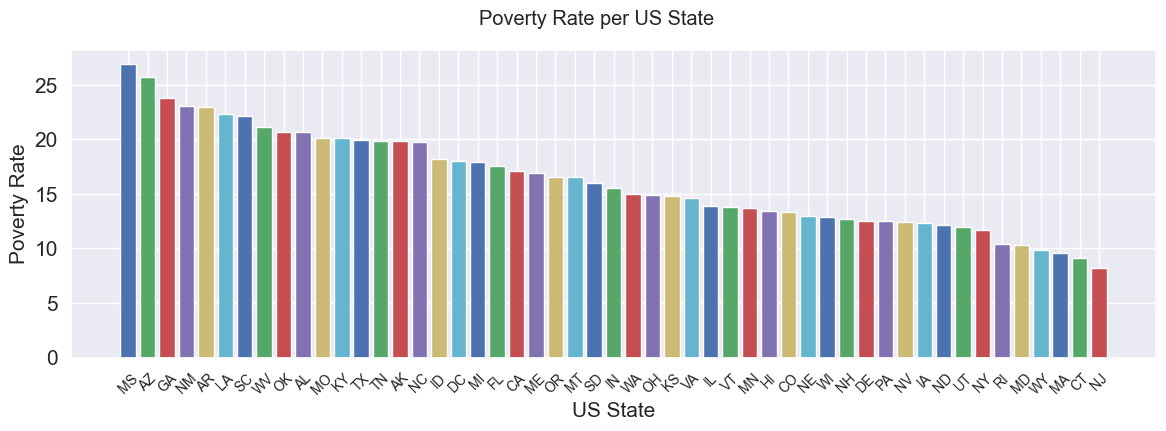

In [147]:
plt.style.use('seaborn-deep')

plt.figure(figsize=(14,4))
plt.suptitle('Poverty Rate per US State')
plt.ylabel('Poverty Rate', fontsize = 15)
plt.xlabel('US State', fontsize = 15)

for n in range(len(poverty)):
    plt.xticks(fontsize = 10, rotation = 45)
    plt.yticks(fontsize = 15)
    plt.bar(poverty.index[n], poverty[n])

plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [148]:
df_pct_completed_hs.percent_completed_hs.replace('-', np.nan, regex = True, inplace = True)
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)

In [149]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [150]:
graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending = False)

In [151]:
graduation

Geographic Area
MA   92.40
WY   92.10
HI   91.67
UT   91.62
CT   91.59
ME   91.43
NJ   90.85
NH   90.71
NY   90.61
MT   90.49
WI   90.26
IA   90.11
CO   90.11
NE   89.99
VT   89.98
MN   89.47
DC   89.30
MI   89.21
PA   89.02
RI   88.82
DE   88.52
IL   88.48
MD   88.42
OH   88.34
OR   88.30
KS   88.23
WA   88.20
ND   87.82
SD   87.75
NV   87.72
IN   86.32
FL   85.74
ID   85.17
VA   84.88
AK   84.63
MO   83.52
NC   83.25
OK   82.91
KY   82.37
WV   82.35
CA   81.96
TN   81.63
NM   80.98
SC   80.85
AZ   80.47
AL   80.30
AR   79.95
LA   79.29
GA   79.01
MS   78.47
TX   75.69
Name: percent_completed_hs, dtype: float64

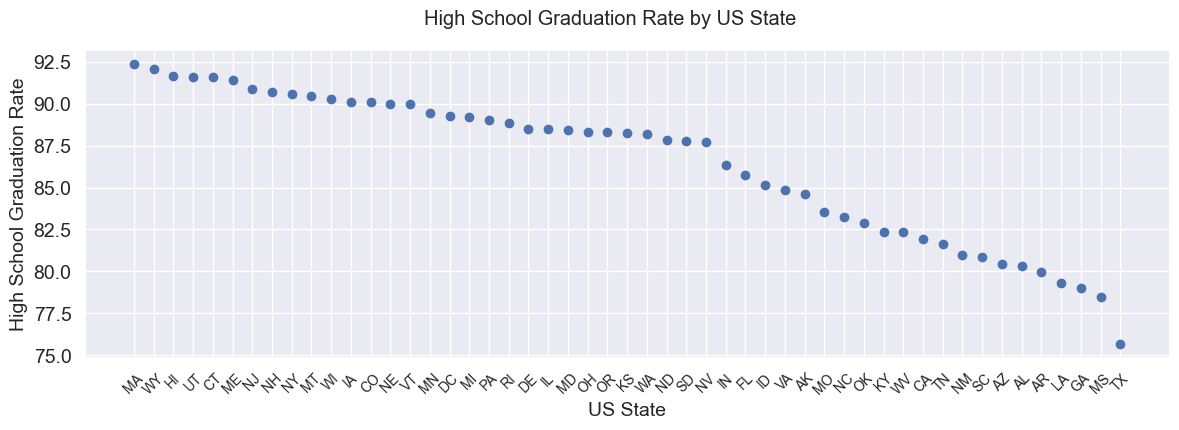

In [152]:
plt.figure(figsize=(14,4))
plt.suptitle('High School Graduation Rate by US State')
plt.ylabel('High School Graduation Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 14)
plt.scatter(graduation.index, graduation)

plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the ratios of poverty and high school graduation move together.  

In [153]:
graduation_vs = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()
graduation_vs

Geographic Area
AK   84.63
AL   80.30
AR   79.95
AZ   80.47
CA   81.96
CO   90.11
CT   91.59
DC   89.30
DE   88.52
FL   85.74
GA   79.01
HI   91.67
IA   90.11
ID   85.17
IL   88.48
IN   86.32
KS   88.23
KY   82.37
LA   79.29
MA   92.40
MD   88.42
ME   91.43
MI   89.21
MN   89.47
MO   83.52
MS   78.47
MT   90.49
NC   83.25
ND   87.82
NE   89.99
NH   90.71
NJ   90.85
NM   80.98
NV   87.72
NY   90.61
OH   88.34
OK   82.91
OR   88.30
PA   89.02
RI   88.82
SC   80.85
SD   87.75
TN   81.63
TX   75.69
UT   91.62
VA   84.88
VT   89.98
WA   88.20
WI   90.26
WV   82.35
WY   92.10
Name: percent_completed_hs, dtype: float64

In [154]:
poverty_vs = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()

In [155]:
poverty_vs

Geographic Area
AK   19.85
AL   20.65
AR   22.96
AZ   25.67
CA   17.12
CO   13.36
CT    9.14
DC   18.00
DE   12.56
FL   17.57
GA   23.78
HI   13.40
IA   12.29
ID   18.24
IL   13.88
IN   15.50
KS   14.76
KY   20.08
LA   22.34
MA    9.59
MD   10.31
ME   16.89
MI   17.90
MN   13.75
MO   20.11
MS   26.88
MT   16.51
NC   19.75
ND   12.16
NE   12.98
NH   12.66
NJ    8.19
NM   23.08
NV   12.47
NY   11.67
OH   14.85
OK   20.66
OR   16.52
PA   12.52
RI   10.37
SC   22.16
SD   16.03
TN   19.89
TX   19.92
UT   11.98
VA   14.59
VT   13.79
WA   15.02
WI   12.86
WV   21.13
WY    9.89
Name: poverty_rate, dtype: float64

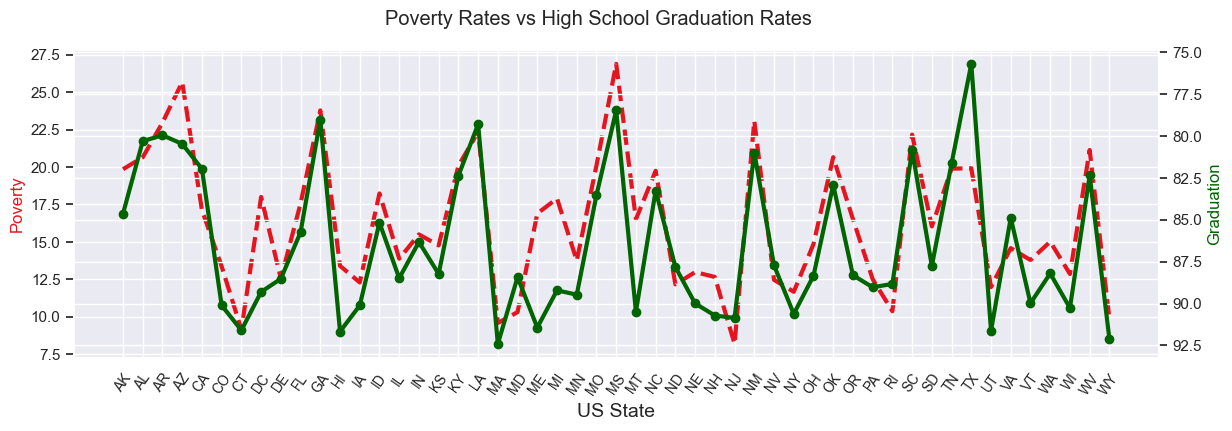

In [156]:
plt.figure(figsize=(14, 4))
plt.suptitle('Poverty Rates vs High School Graduation Rates')
plt.xlabel('US State', fontsize=14)
plt.xticks(fontsize=10, rotation=55)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty', color='#E5141E')
ax2.set_ylabel('Graduation', color='darkgreen')

ax1.plot(poverty_vs.index, poverty_vs, color='#E5141E', linewidth=3, linestyle='--')
ax2.plot(graduation_vs.index, graduation_vs, color='darkgreen', linewidth=3, marker='o')

# Reverse the y-axis for the graduation rate
ax2.invert_yaxis()

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [157]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.80
1,AL,Abbeville city,29.10
2,AL,Adamsville city,25.50
3,AL,Addison town,30.70
4,AL,Akron town,42.00
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.60
29325,WY,Worland city,15.30
29326,WY,Wright town,5.90
29327,WY,Yoder town,5.40


In [158]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)
df_pct_poverty.sort_values('poverty_rate', ascending=False, inplace=True)
poverty = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate': pd.Series.mean})

In [159]:
poverty

,Geographic Area,poverty_rate
0,AK,19.85
1,AL,20.65
2,AR,22.96
3,AZ,25.67
4,CA,17.12
5,CO,13.36
6,CT,9.14
7,DC,18.00
8,DE,12.56
9,FL,17.57


In [160]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_completed_hs.sort_values('percent_completed_hs', ascending=False, inplace=True)
hs = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': pd.Series.mean})

In [161]:
merged = pd.merge(hs, poverty, on=['Geographic Area'], how='inner')

In [162]:
merged

,Geographic Area,percent_completed_hs,poverty_rate
0,AK,84.63,19.85
1,AL,80.30,20.65
2,AR,79.95,22.96
3,AZ,80.47,25.67
4,CA,81.96,17.12
5,CO,90.11,13.36
6,CT,91.59,9.14
7,DC,89.30,18.00
8,DE,88.52,12.56
9,FL,85.74,17.57


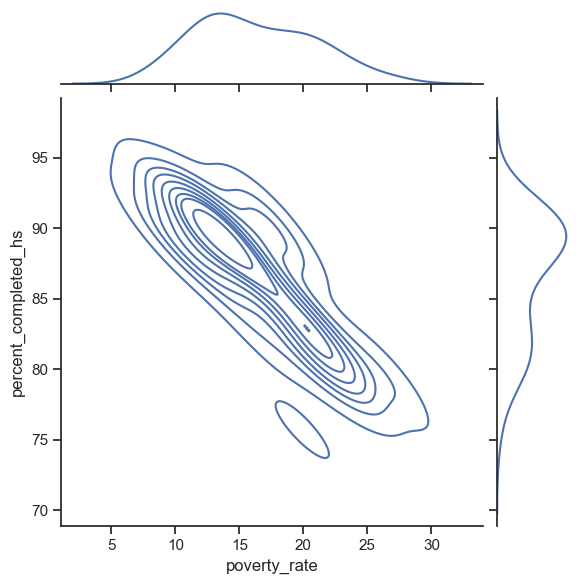

In [163]:
sns.set_theme(style="ticks")

sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged, kind='kde')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

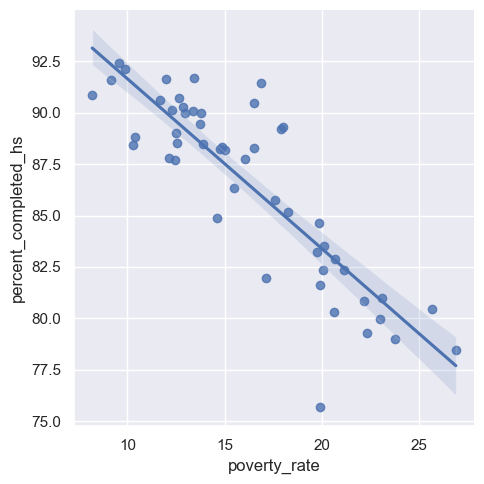

In [164]:
sns.set_theme(color_codes=True)

sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

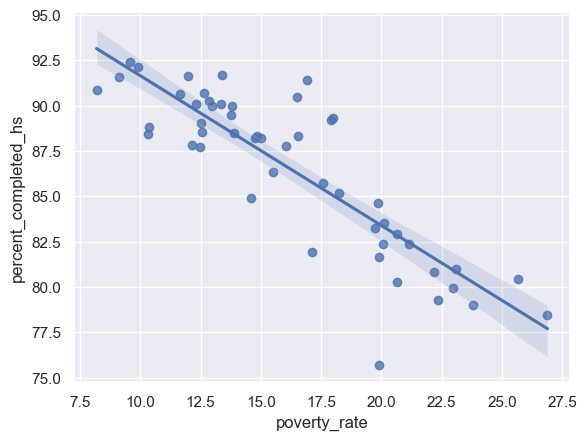

In [165]:
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [166]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [167]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')

In [168]:
racial = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'})
racial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, AK to WY
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   share_white            51 non-null     float64
 1   share_black            51 non-null     float64
 2   share_native_american  51 non-null     float64
 3   share_asian            51 non-null     float64
 4   share_hispanic         51 non-null     float64
dtypes: float64(5)
memory usage: 2.4+ KB


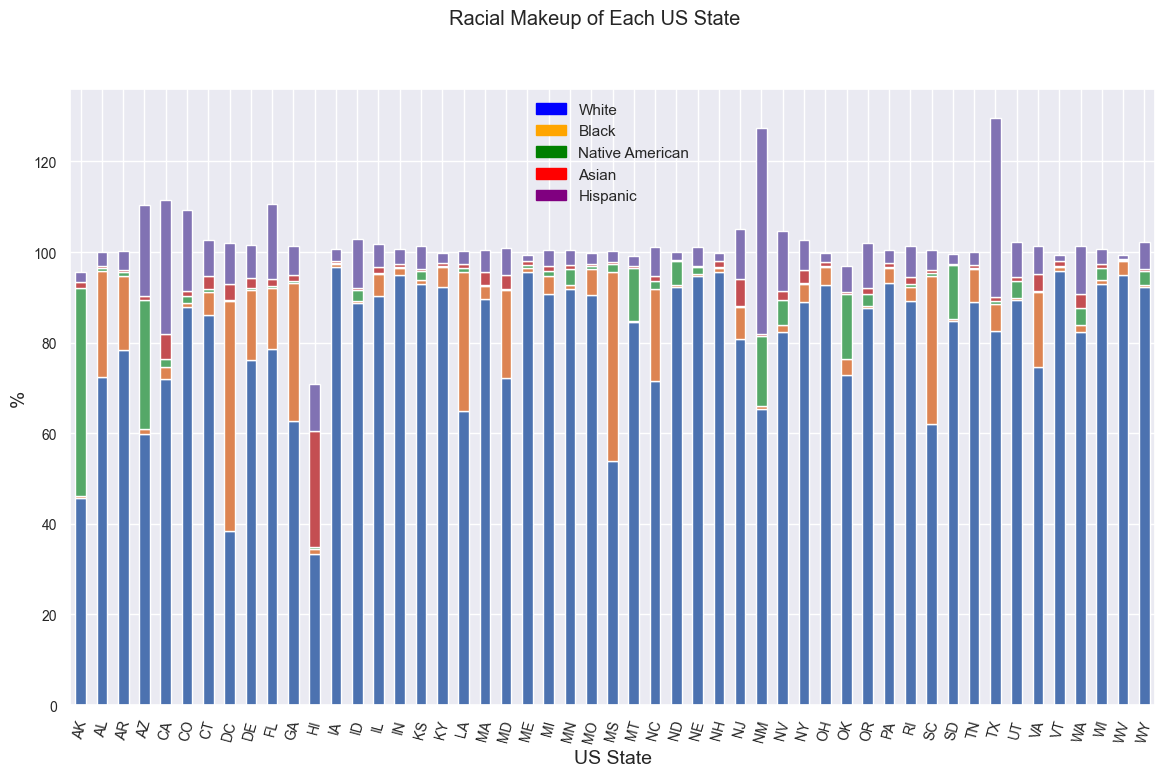

In [169]:
racial.plot(kind='bar', stacked=True, figsize=(14,8))
plt.suptitle('Racial Makeup of Each US State')
plt.ylabel('%', fontsize=14)
plt.xlabel('US State', fontsize=14)

white_legend = mpatches.Patch(label='White', color='blue')
black_legend = mpatches.Patch(label='Black', color='orange')
native_american_legend = mpatches.Patch(label='Native American', color='green')
asian_legend = mpatches.Patch(label='Asian', color='red')
hispanic_legend = mpatches.Patch(label='Hispanic', color='purple')

plt.legend(handles=[white_legend, black_legend, native_american_legend, asian_legend, hispanic_legend], loc='best', frameon=False)

plt.xticks(fontsize=10, rotation=75)
plt.yticks(fontsize=10)

plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [170]:
killed = df_fatalities.race.value_counts()

In [171]:
killed

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [172]:
df_fatalities.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [173]:
label_mapping = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other'
}

# Replace the index labels using the map function
killed.index = killed.index.map(label_mapping)

In [174]:
import plotly.graph_objects as go

labels = killed.index
values = killed.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6, textinfo='label+percent')])

fig.update_layout(title='People Killed by Race')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [175]:
killed_gender = df_fatalities.gender.value_counts()
killed_gender

M    2428
F     107
Name: gender, dtype: int64

In [176]:
gender = killed_gender.index
count = killed_gender.values


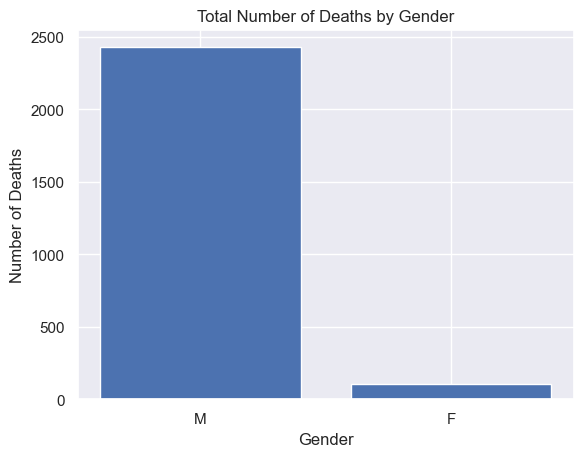

In [177]:
plt.bar(gender, count)


plt.xlabel("Gender")
plt.ylabel("Number of Deaths")
plt.title("Total Number of Deaths by Gender")


plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [178]:
df_fatalities.age = df_fatalities.age.replace(np.nan, 0)

In [179]:
df_fatalities.age.isnull().any()

False

In [180]:
death_age = df_fatalities[['age', 'manner_of_death', 'gender']]

In [181]:
death_age

,age,manner_of_death,gender
0,53.00,shot,M
1,47.00,shot,M
2,23.00,shot and Tasered,M
3,32.00,shot,M
4,39.00,shot,M
...,...,...,...
2530,31.00,shot,M
2531,0.00,shot,M
2532,48.00,shot,M
2533,28.00,shot,M


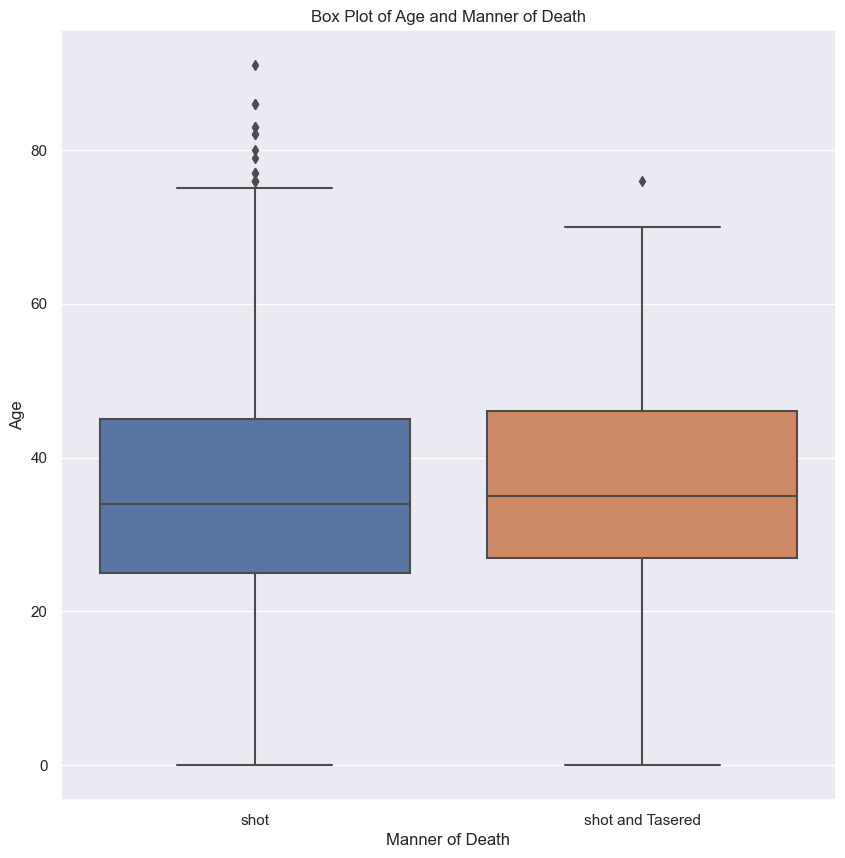

In [182]:
plt.figure(figsize=(10,10))
sns.boxplot(x="manner_of_death", y="age", data=death_age)

plt.xlabel("Manner of Death")
plt.ylabel("Age")
plt.title("Box Plot of Age and Manner of Death")

plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [183]:
weapons = df_fatalities.armed.unique()

In [184]:
weapons

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

In [185]:
df_fatalities.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

In [186]:
# Rename the 'armed' column to 'weapon'
df_fatalities.rename(columns={'armed': 'weapon'}, inplace=True)

# Create the 'armed' column
df_fatalities['armed'] = df_fatalities['weapon'] != 'unarmed'

# Print the updated dataframe
print(df_fatalities)

        id                name      date   manner_of_death      weapon   age  \
0        3          Tim Elliot  02/01/15              shot         gun 53.00   
1        4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2        5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3        8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4        9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   
...    ...                 ...       ...               ...         ...   ...   
2530  2822    Rodney E. Jacobs  28/07/17              shot         gun 31.00   
2531  2813               TK TK  28/07/17              shot     vehicle  0.00   
2532  2818  Dennis W. Robinson  29/07/17              shot         gun 48.00   
2533  2817       Isaiah Tucker  31/07/17              shot     vehicle 28.00   
2534  2815        Dwayne Jeune  31/07/17              shot       knife 32.00   

     gender race           city state  

In [187]:
armed_pctg = len(df_fatalities[df_fatalities.armed == True]) / len(df_fatalities) * 100

In [188]:
armed_pctg=round(armed_pctg,2)

In [189]:
print(f'In police killings, {armed_pctg}% of the victims were armed.')

In police killings, 93.25% of the victims were armed.


In [190]:
df_fatalities['armed'] = df_fatalities['armed'].map({True: 'armed', False: 'unarmed'})

In [191]:
df_fatalities.armed

0         armed
1         armed
2       unarmed
3         armed
4         armed
         ...   
2530      armed
2531      armed
2532      armed
2533      armed
2534      armed
Name: armed, Length: 2535, dtype: object

In [192]:
percentage = df_fatalities.armed.value_counts()

In [193]:
percentage

armed      2364
unarmed     171
Name: armed, dtype: int64

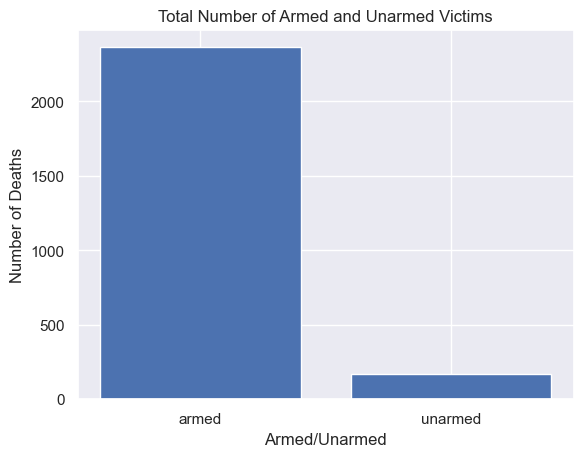

In [194]:
plt.bar(percentage.index, percentage.values)


plt.xlabel("Armed/Unarmed")
plt.ylabel("Number of Deaths")
plt.title("Total Number of Armed and Unarmed Victims")


plt.show()

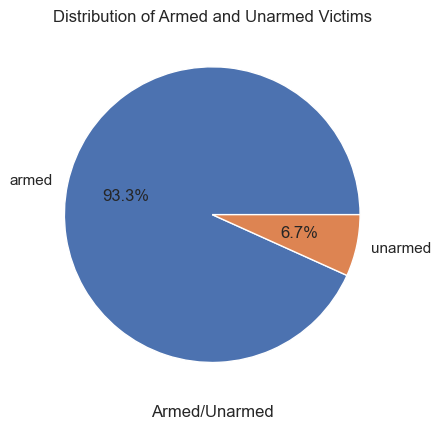

In [195]:
percentage = df_fatalities['armed'].value_counts() * 100

plt.pie(percentage.values, labels=percentage.index, autopct='%1.1f%%')

plt.title("Distribution of Armed and Unarmed Victims")
plt.xlabel("Armed/Unarmed")

plt.show()

In [196]:
weapon_counts = df_fatalities['weapon'].value_counts()
weapon_counts

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: weapon, Length: 68, dtype: int64

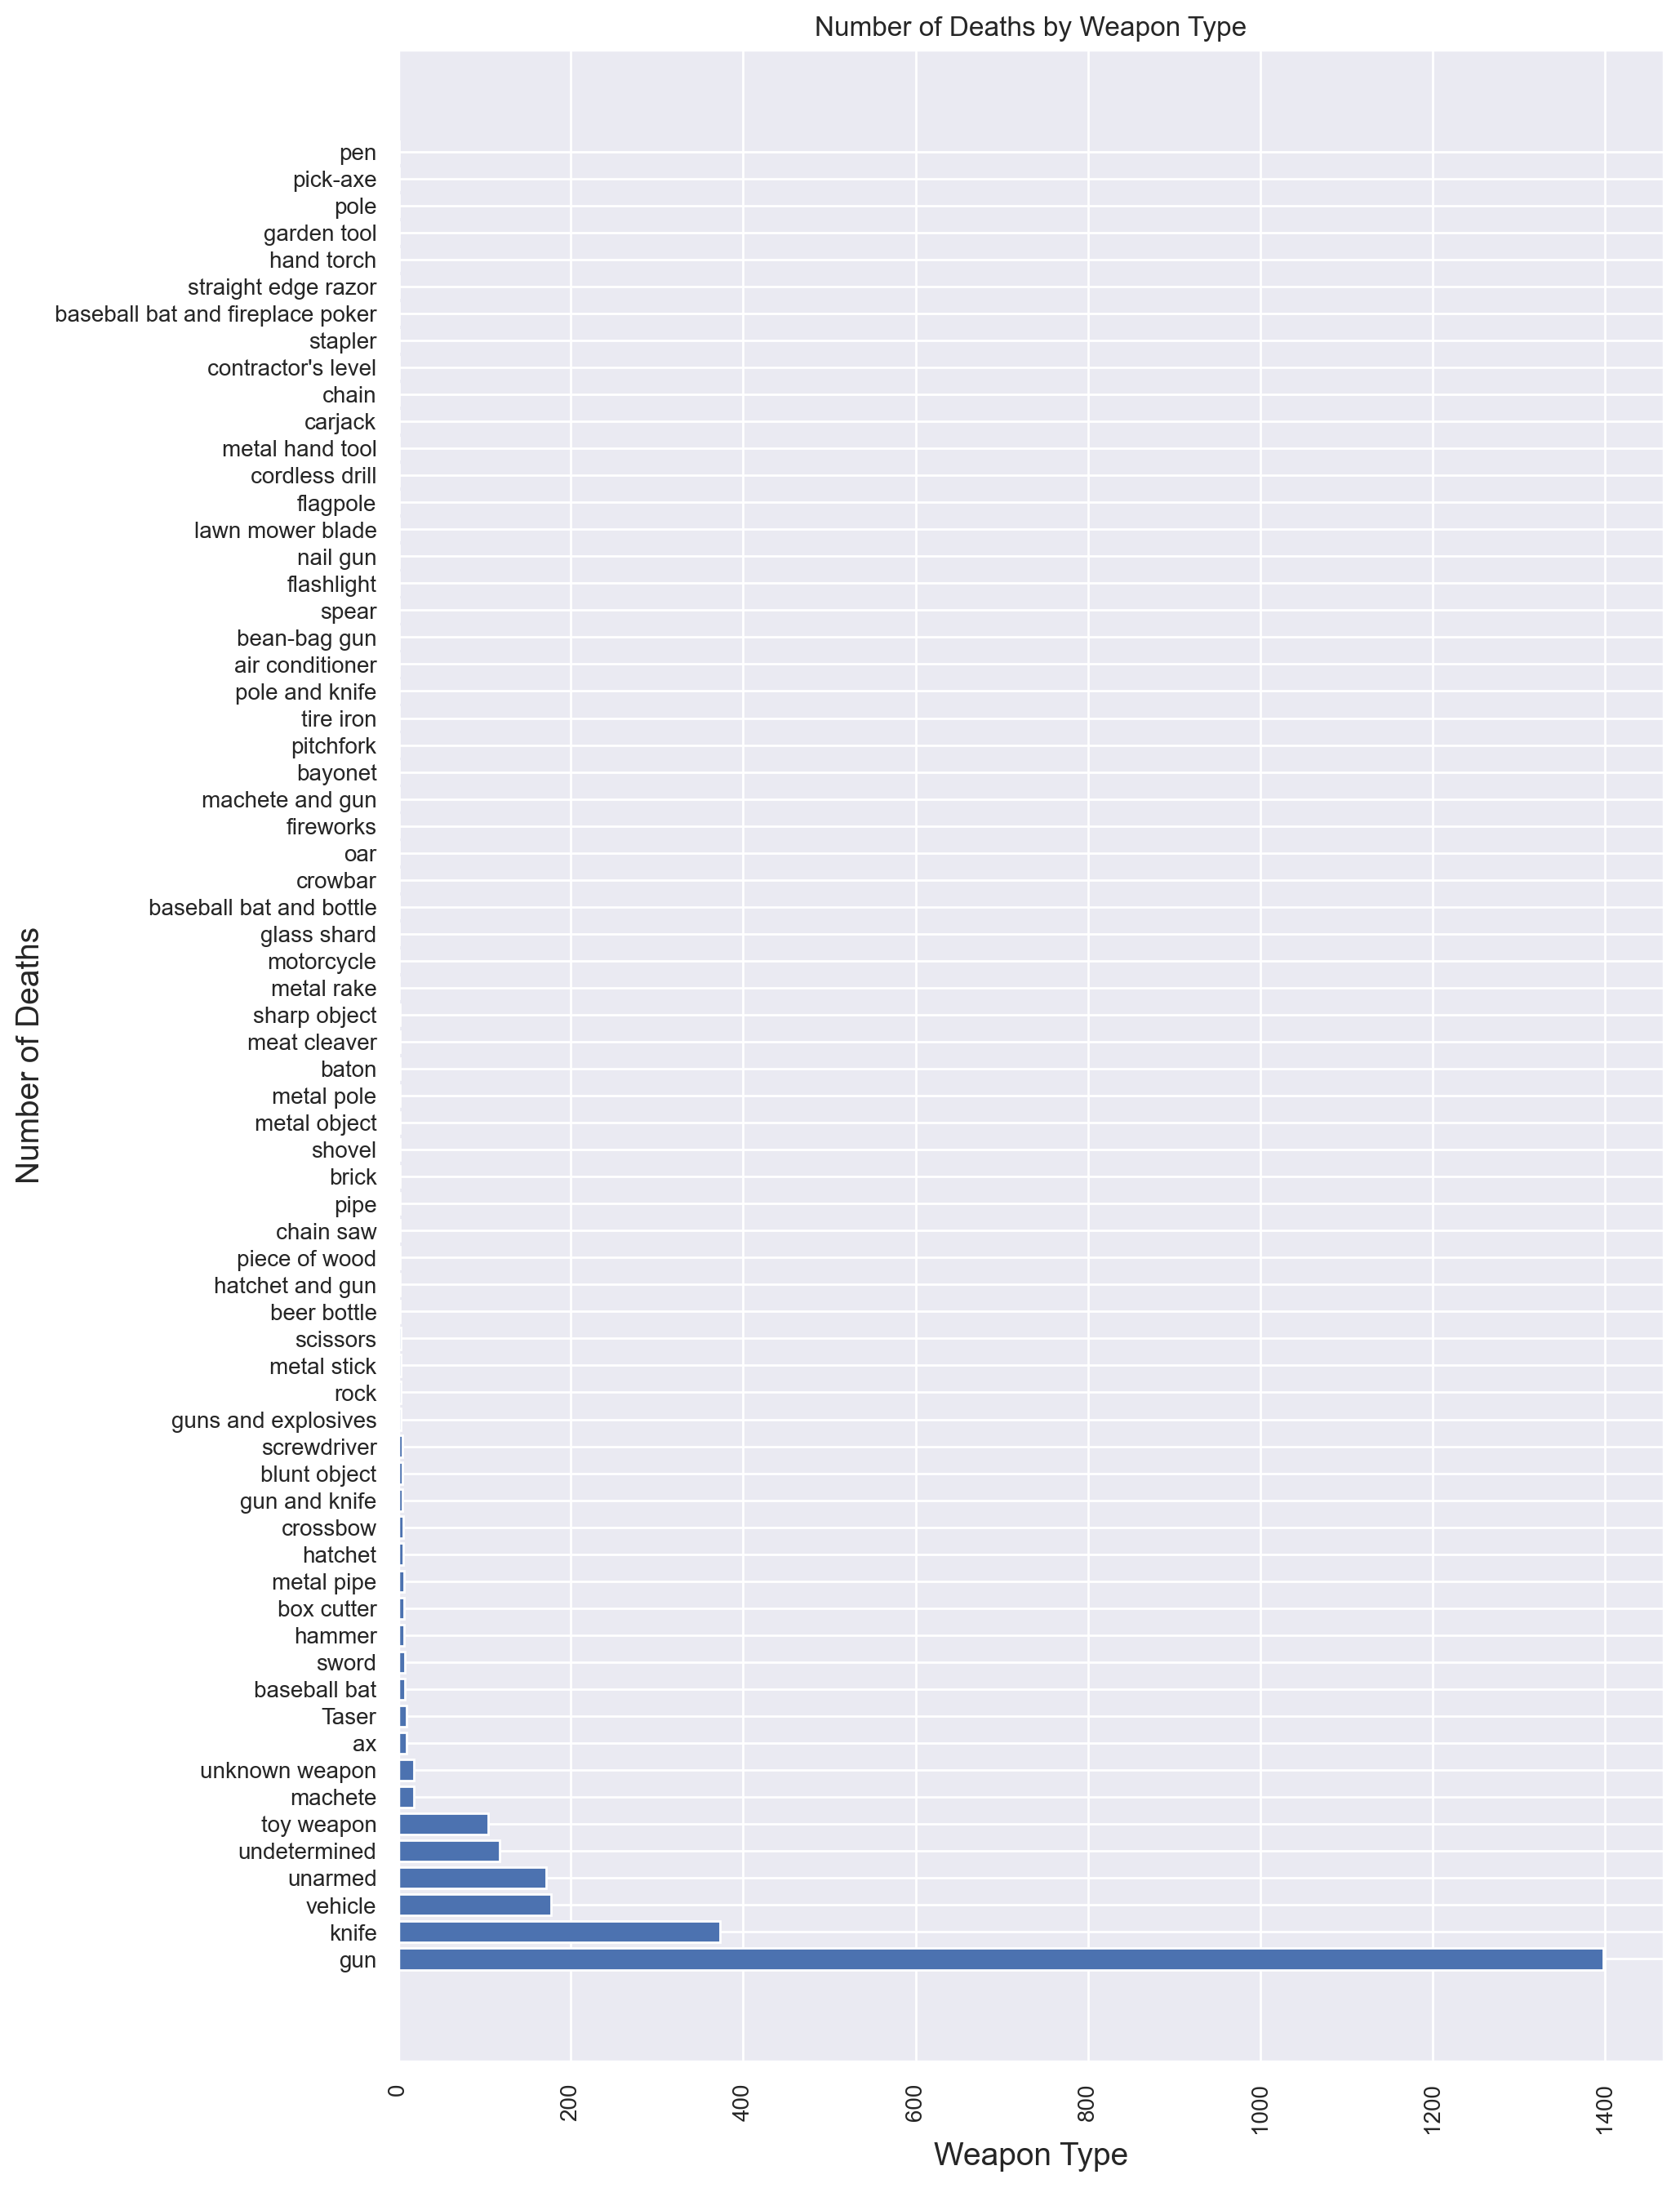

In [197]:
plt.figure(figsize=(10,16), dpi = 200)
plt.barh(weapon_counts.index, weapon_counts.values)

plt.xlabel("Weapon Type", fontsize = 14)
plt.ylabel("Number of Deaths", fontsize = 14)
plt.title("Number of Deaths by Weapon Type")

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [198]:
u25 = df_fatalities[df_fatalities.age < 25]

In [199]:
pct_u25 = round(len(u25) / len(df_fatalities) * 100, 2)

In [200]:
print(f'{pct_u25}% of the people killed by the police, were under 25 years old.')

20.79% of the people killed by the police, were under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

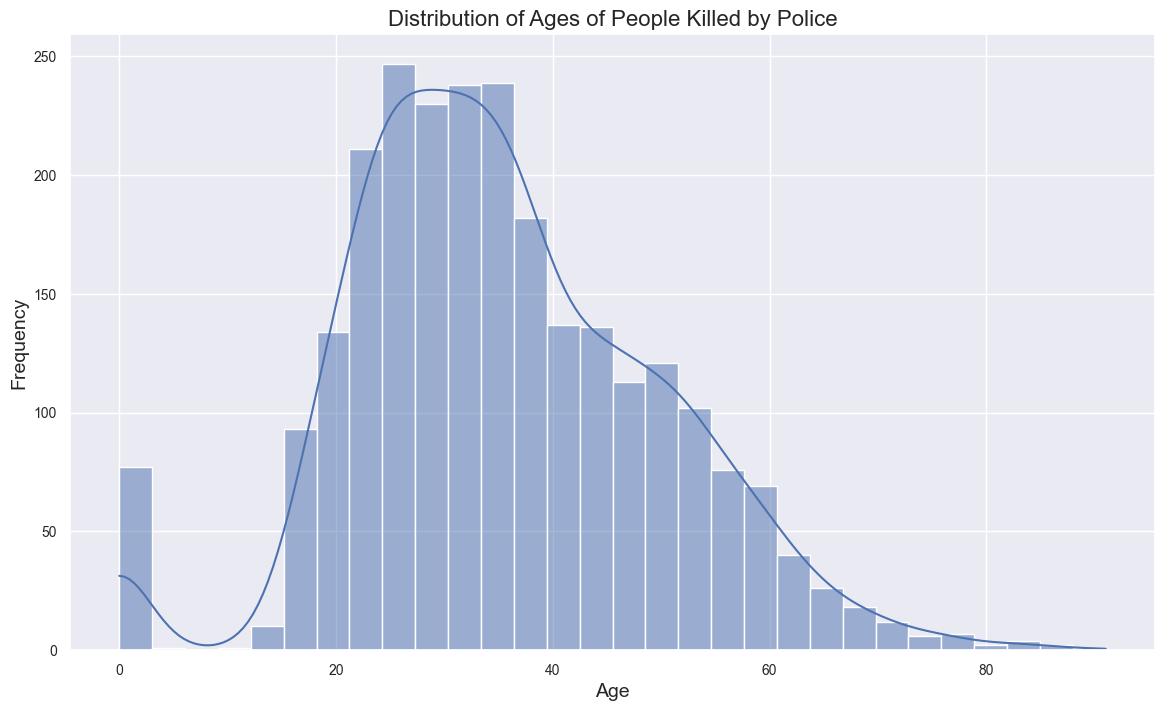

In [201]:
plt.figure(figsize = (14,8))
sns.histplot(data=df_fatalities, x='age', bins=30, kde=True)

plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Ages of People Killed by Police", fontsize=16)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

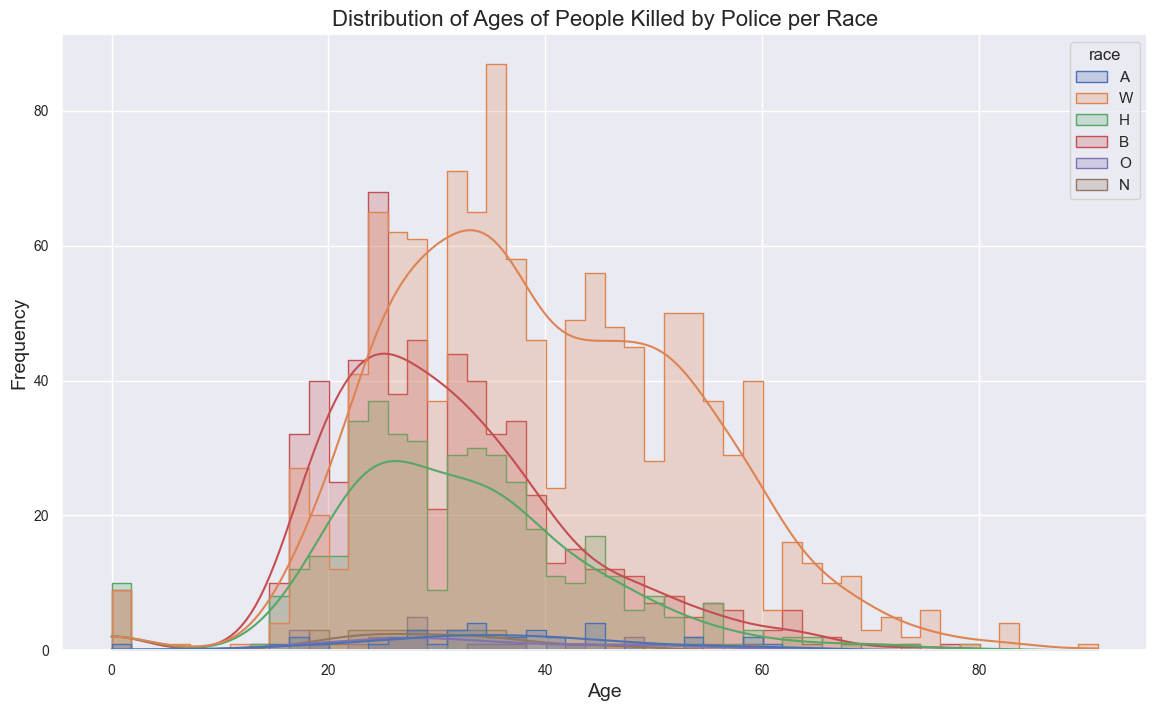

In [202]:
plt.figure(figsize = (14,8))
sns.histplot(data=df_fatalities, x='age', bins=50, kde=True, hue='race', element='step')

plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Ages of People Killed by Police per Race", fontsize=16)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [203]:
race_kill = df_fatalities.race.value_counts()
race_kill

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

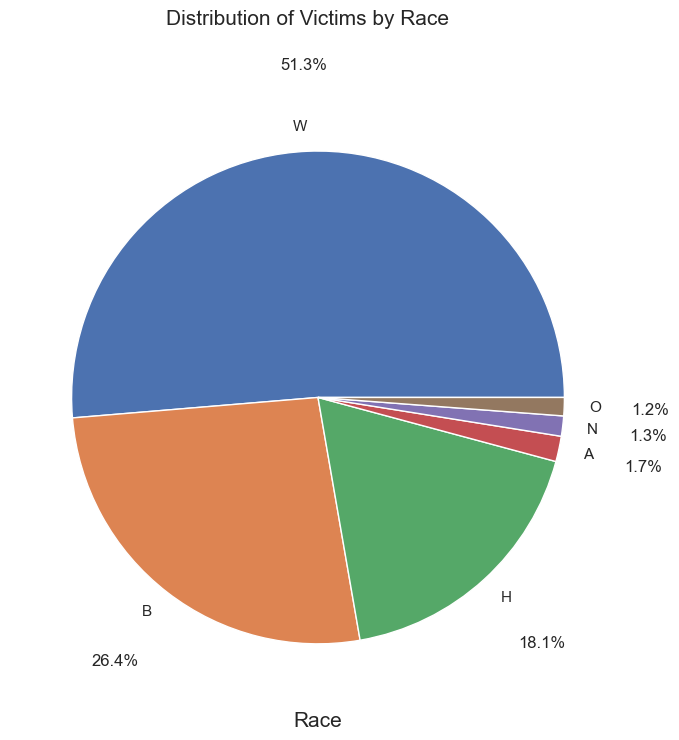

In [204]:
plt.figure(figsize = (8,8))
plt.pie(race_kill.values, labels=race_kill.index, autopct='%1.1f%%',pctdistance=1.35, labeldistance=1.1)

plt.suptitle("Distribution of Victims by Race", fontsize = 15)
plt.xlabel("Race", fontsize = 15)

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [205]:
mental = df_fatalities.signs_of_mental_illness.value_counts()
mental

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

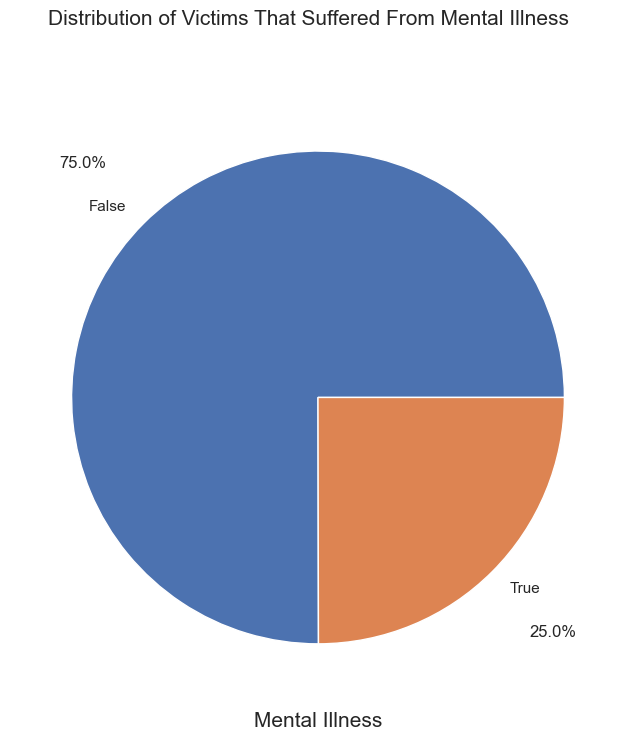

In [206]:
plt.figure(figsize = (8,8))
plt.pie(mental.values, labels=mental.index, autopct='%1.1f%%',pctdistance=1.35, labeldistance=1.1)

plt.suptitle("Distribution of Victims That Suffered From Mental Illness", fontsize = 15)
plt.xlabel("Mental Illness", fontsize = 15)

plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [207]:
cities = df_fatalities.city.value_counts().head(10)
cities

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

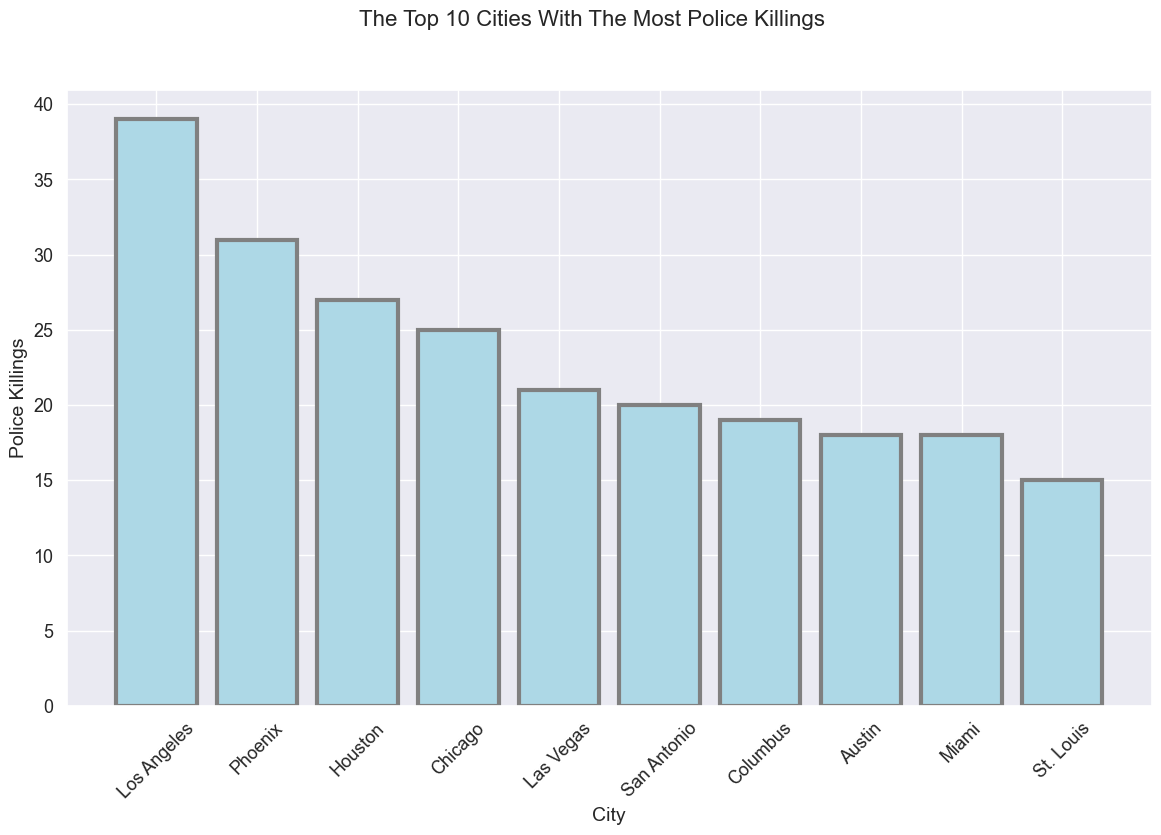

In [208]:
plt.figure(figsize=(14,8))
plt.suptitle('The Top 10 Cities With The Most Police Killings', fontsize=16)
plt.ylabel('Police Killings', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.bar(cities.index, cities, label=cities.index, linewidth=3, color = 'lightblue', edgecolor = 'gray')
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [209]:
df_fatalities[['city', 'race']]

,city,race
0,Shelton,A
1,Aloha,W
2,Wichita,H
3,San Francisco,W
4,Evans,H
...,...,...
2530,Kansas City,NaN
2531,Albuquerque,NaN
2532,Melba,NaN
2533,Oshkosh,B


In [210]:
cities

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

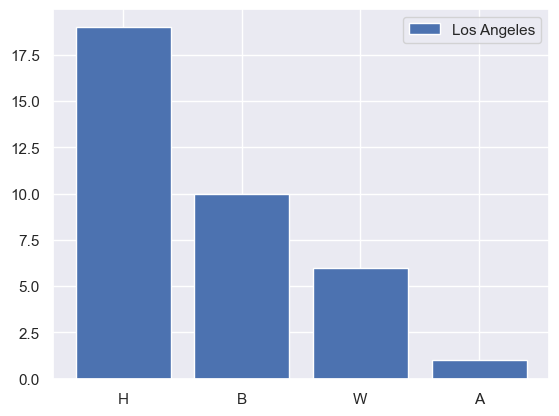

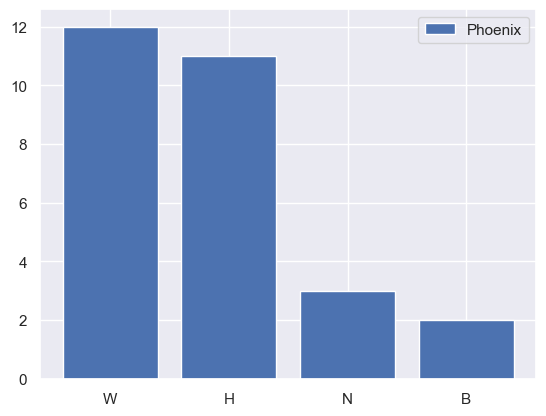

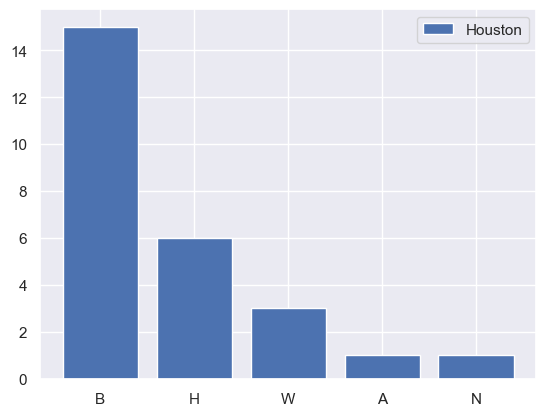

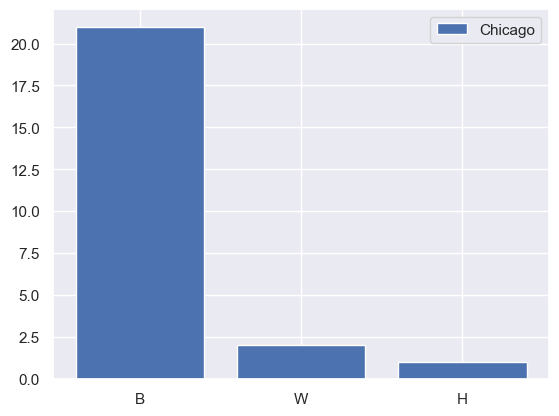

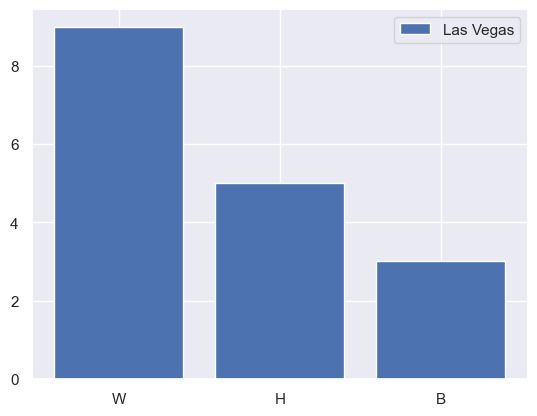

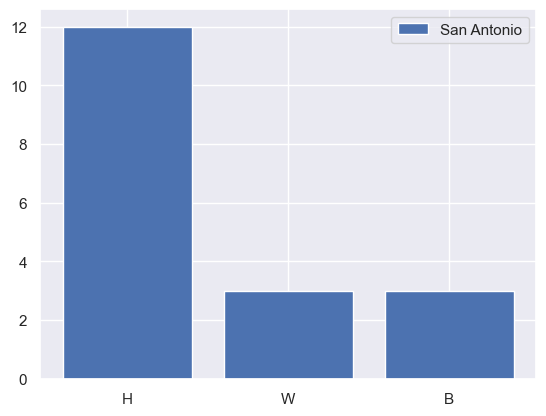

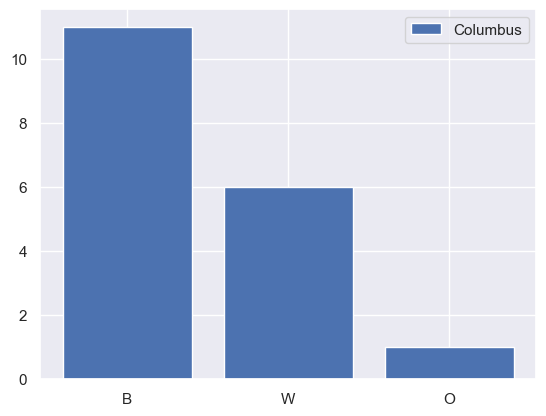

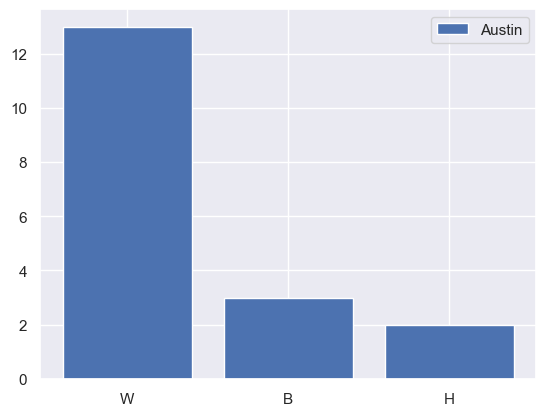

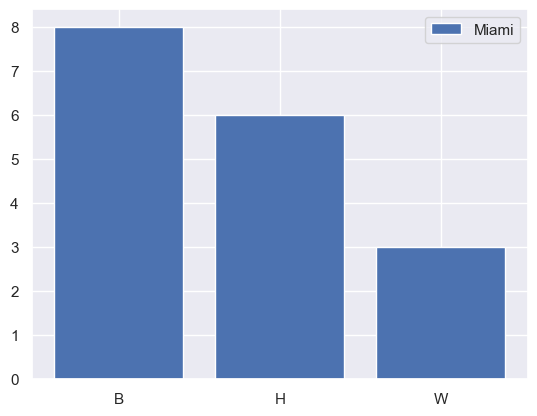

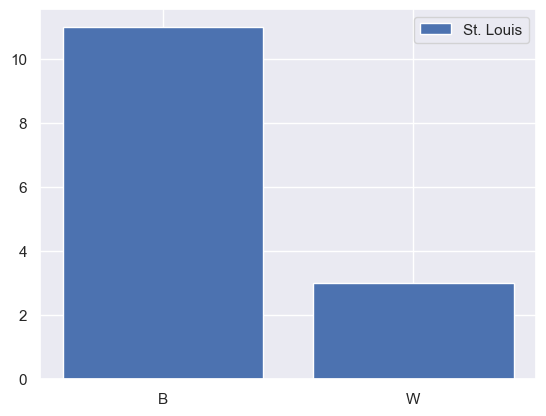

In [211]:
top = df_fatalities[['city', 'race']]
for c in cities.index:
    top_cities = top.loc[top['city'] == c]
    city = top_cities.race.value_counts()
    plt.bar(city.index, city, label=c)
    plt.legend(loc='best')
    plt.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [212]:
states_to_map = df_fatalities.groupby('state').size().sort_values(ascending=False)
states_to_map

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
KY     43
WI     43
IN     43
NV     42
OR     38
MD     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
MS     23
UT     23
MA     22
ID     17
AK     15
NE     15
ME     13
IA     12
MT     11
HI     11
DC     11
SD     10
CT      9
DE      8
WY      8
NH      7
ND      4
VT      3
RI      2
dtype: int64

In [214]:
fig = go.Figure(data=go.Choropleth(locations=states_to_map.index, z = states_to_map, locationmode = 'Europe', 
                                   colorscale = 'Oranges', colorbar_title = "Police Killings",))

fig.update_layout(title_text = 'Police Killings by US State', geo_scope='usa')

fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'locationmode' property of choropleth
        Received value: 'Europe'

    The 'locationmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['ISO-3', 'USA-states', 'country names', 'geojson-id']

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [409]:
monthly_fatalities = df_fatalities.copy()
monthly_fatalities.date = pd.to_datetime(monthly_fatalities.date, infer_datetime_format=True).dt.to_period('m')
monthly_fatalities.date = monthly_fatalities.date.astype(str)

In [410]:
history = monthly_fatalities.groupby('date').size()
history

date
2015-01    70
2015-02    78
2015-03    87
2015-04    88
2015-05    85
2015-06    68
2015-07    85
2015-08    86
2015-09    90
2015-10    89
2015-11    80
2015-12    85
2016-01    85
2016-02    79
2016-03    89
2016-04    75
2016-05    82
2016-06    90
2016-07    78
2016-08    79
2016-09    71
2016-10    77
2016-11    84
2016-12    74
2017-01    75
2017-02    69
2017-03    74
2017-04    70
2017-05    61
2017-06    63
2017-07    71
2017-08    18
2017-09    23
2017-10    21
2017-11    16
2017-12    20
dtype: int64

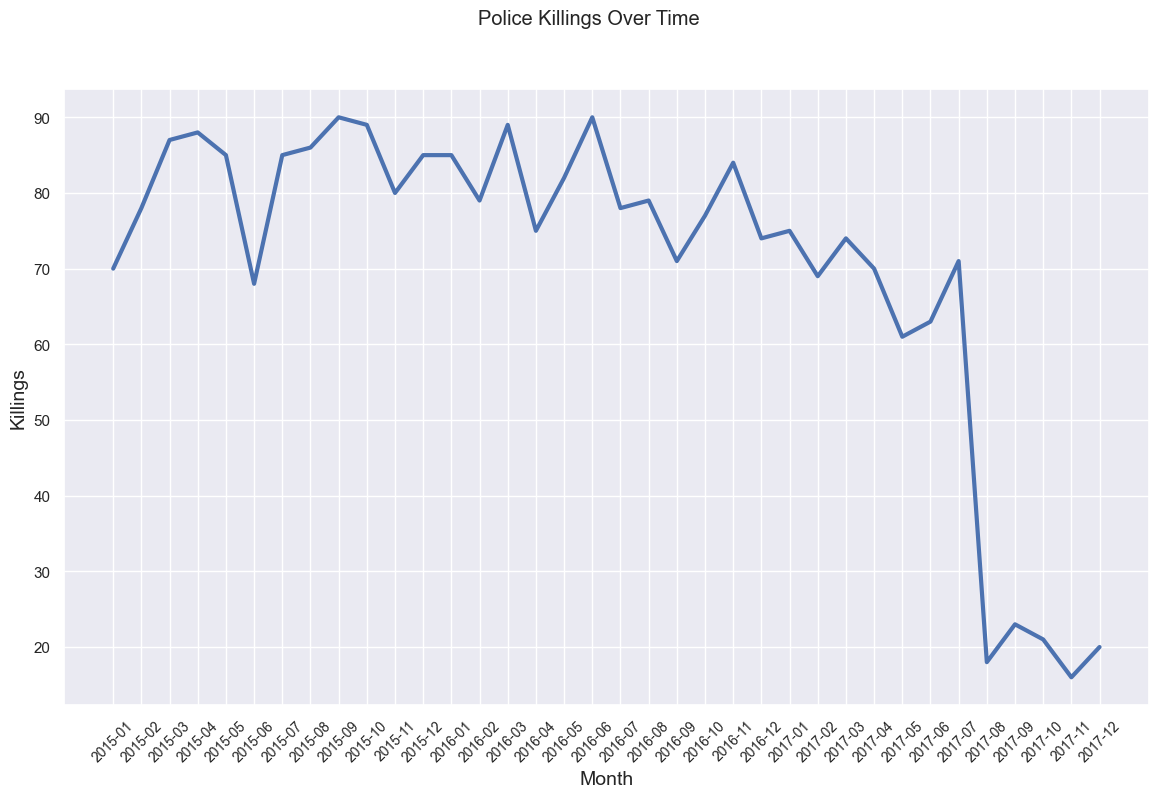

In [413]:
plt.figure(figsize=(14,8))
plt.plot(history.index, history, linewidth=3)
plt.xticks(ticks=history.index, fontsize=10, rotation=45)
plt.suptitle('Police Killings Over Time')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Killings', fontsize=14)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).